<a href="https://colab.research.google.com/github/ShrutiThakar/SENTIMENT-ANALYSIS/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.90      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



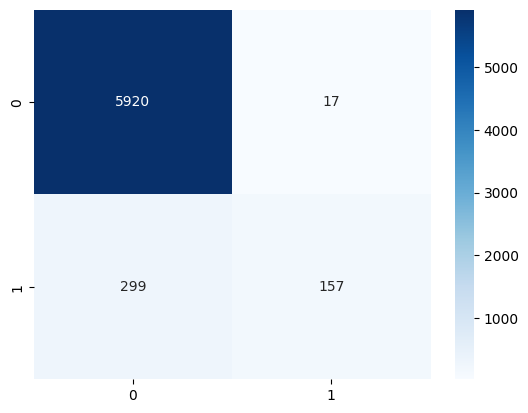

In [1]:
# Install required libraries
!pip install nltk seaborn

# Import libraries
import pandas as pd, re, string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords'); nltk.download('wordnet')

# Load dataset
!wget -q https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv
data = pd.read_csv("train.csv")[['label', 'tweet']]
data.columns = ['sentiment', 'text']
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 1 else 0)

# Preprocessing
def clean(text):
    text = text.lower()
    text = re.sub(r"http\\S+|\\W|\\d", " ", text)
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stopwords.words('english')]
    return " ".join(words)
data['clean'] = data['text'].apply(clean)

# Vectorize
X = TfidfVectorizer(max_features=5000).fit_transform(data['clean'])
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()